In [3]:
# 1) Develop a KNN classification model for the Cancer dataset using scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import stats
df=pd.read_csv('cancer.csv')
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [4]:
# a) use the columns: 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'
# 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
# 'symmetry_mean', 'fractal_dimension_mean', as the independent variables
x=df.iloc[:,0:11]
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
# b) use the target variable as 'diagnosis' (Malignant - M, Benign - B)
y=df.iloc[:,11]
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [6]:
# c) Encode the categorical value of the target column to numerical value 
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# d) Divide the data into training (75%) and testing set (25%)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)

In [8]:
# e) Perform the classification with K = 3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
# f) Analyse the performance of the classifier with various performance measures
# such as confusion matrix, accuracy, recall, precision, specificity, f-score, 
# Receiver operating characteristics curve and Area under curve score.
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [10]:
conf_matrix=confusion_matrix(y_test,y_pred)
cm=conf_matrix
conf_matrix

array([[77, 12],
       [33, 21]])

In [11]:
accc=accuracy_score(y_test,y_pred)
fsc=f1_score(y_test,y_pred)
print("accuracy:",accuracy_score(y_test,y_pred))
print("specificity:",recall_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("presiction:",precision_score(y_test,y_pred))
print("f1:",f1_score(y_test,y_pred))

accuracy: 0.6853146853146853
specificity: 0.3888888888888889
recall: 0.3888888888888889
presiction: 0.6363636363636364
f1: 0.4827586206896552


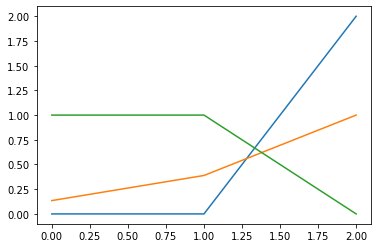

In [12]:
plt.plot(roc_curve(y_test,y_pred))

In [13]:
auc1,auc2,thresholds=roc_curve(y_test,y_pred)
auccc=auc(auc1,auc2)
auc(auc1,auc2)

0.6270287141073657

In [14]:
x_f=StandardScaler(x)
x_f

StandardScaler(copy=           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140....
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140

In [15]:
x_p=StandardScaler().fit_transform(x)
x_p

array([[-2.36405166e-01,  1.09706398e+00, -2.07333501e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [-2.36403445e-01,  1.82982061e+00, -3.53632408e-01, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 4.31741086e-01,  1.57988811e+00,  4.56186952e-01, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [-2.35727466e-01,  7.02284249e-01,  2.04557380e+00, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [-2.35725168e-01,  1.83834103e+00,  2.33645719e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-2.42405862e-01, -1.80840125e+00,  1.22179204e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [16]:
np.mean(x_p)

4.88150465532582e-17

In [17]:
np.median(x_p)

-0.23581339121091452

In [18]:
stats.mode(x_p)

ModeResult(mode=array([[-0.24307899, -0.50761623, -1.01451947, -0.38550046, -0.40582245,
         0.30883801,  0.19631867, -1.11487284, -1.26181958, -0.76895669,
        -0.86865246]]), count=array([[ 1,  4,  3,  3,  3,  5,  3, 13, 13,  4,  3]]))

In [19]:
# ftn=[]

In [20]:
# h) Change the value of K in KNN with 5,6,7,9,11 and tabulate the various TP, TN,
# accuracy, f-score and AUC score obtained. 
for i in range(3,12,2):
 knn=KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 y_pred=knn.predict(x_test)
 conf_matrix=confusion_matrix(y_test,y_pred)
 cm=conf_matrix
 accc=accuracy_score(y_test,y_pred)
 fsc=f1_score(y_test,y_pred)
 auc1,auc2,thresholds=roc_curve(y_test,y_pred)
 auccc=auc(auc1,auc2)
 ins=[i,cm[0][0],cm[1][1],accc,fsc,auccc]
 ftn.append(ins)
ftdn=pd.DataFrame(ftn)
ftdn

,0,1,2,3,4,5
0,3,77,21,0.685315,0.482759,0.627029
1,5,81,13,0.657343,0.346667,0.575427
2,7,80,12,0.643357,0.320000,0.560549
3,9,86,9,0.664336,0.272727,0.566479
4,11,86,11,0.678322,0.323529,0.584998
